## Model Regresi Sederhana

In [1]:
import pandas as pd

# buat dataframe read data
df = pd.read_csv('../../data/socr.csv', sep=',')

# df.set_index('Index', inplace=True)

df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


<h1>Konversi data menjadi satuan CM dan Kg</h1>

In [2]:
df1 = (
    df[['Height(Inches)', 'Weight(Pounds)']]
    .rename(columns={'Height(Inches)': 'Tinggi(CM)', 'Weight(Pounds)': 'Berat(KG)'})
    .assign(Tinggi=lambda x: x['Tinggi(CM)'] * 2.54, Berat=lambda x: x['Berat(KG)'] * 0.453592)
    .round({'Tinggi(CM)': 2, 'Berat(KG)': 2})
).copy()
df1.head()

,Tinggi(CM),Berat(KG),Tinggi,Berat
0,65.78,112.99,167.089607,51.252494
1,71.52,136.49,181.648633,61.909547
2,69.40,153.03,176.272800,69.411778
3,68.22,142.34,173.270164,64.562199
4,67.79,144.30,172.181037,65.452010


## Split Data Training 80% dan Data Testing 20%

In [3]:
from sklearn.model_selection import train_test_split

# variabel independent/bebas/fitur (menggunakan kolom Tinggi yang sudah dalam CM)
x = df1[['Tinggi']]
# variabel dependent/terikat/target (menggunakan kolom Berat yang sudah dalam KG)
y = df1['Berat']
# split data training 80% dan data testing 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,Tinggi
23311,172.590384
23623,169.048684
1020,177.932385
12645,173.940876
1533,167.924683


## Pemodelan Data : dengan data training

In [4]:
from sklearn.linear_model import LinearRegression

# buat objek model
model = LinearRegression()
# latih model dengan data training
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluasi Model : dengan data testing

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# prediksi data testing
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg/cm) :", model.coef_[0])
print("Intercept (kg)    :", model.intercept_)
print("R2 Score         :", r2)
print("MAE (kg)         :", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg)        :", rmse)

Koefisien (kg/cm) : 0.5484614827656209
Intercept (kg)    : -37.07518683640529
R2 Score         : 0.2605911351288859
MAE (kg)         : 3.644506485519583
RMSE (kg)        : 4.591998144873526


## Cetak Persamaan Regresi

In [6]:
slope = model.coef_[0]
intercept = model.intercept_
print(f'Persamaan: y = {slope:.2f} * x + {intercept:.2f}')

Persamaan: y = 0.55 * x + -37.08


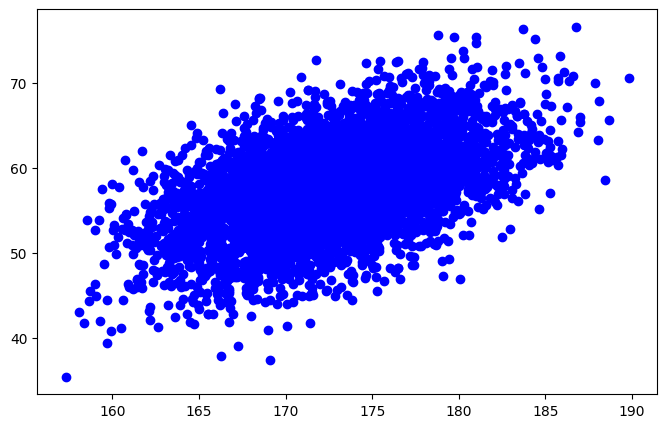

In [7]:
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Data Aktual')

In [8]:
df2 = pd.read_csv('../../data/berat_ti2024.csv', sep=';')
df2

,no,nama,tinggi_cm,actual_berat,prediksi,akurasi
0,1,raffa,168,58.5,NaN,NaN
1,2,tiara,162,78.2,NaN,NaN
2,3,tia,155,52.7,NaN,NaN
3,4,keyla,160,70.3,NaN,NaN
4,5,bani,183,65.8,NaN,NaN


In [9]:
# Prediksi berat berdasarkan tinggi menggunakan model yang sudah dilatih
# Rename kolom agar sesuai dengan nama fitur saat training
df2_temp = df2.copy()
df2_temp = df2_temp.rename(columns={'tinggi_cm': 'Tinggi'})

# Lakukan prediksi
df2['prediksi'] = model.predict(df2_temp[['Tinggi']])

# Hitung akurasi menggunakan R2 Score (dalam persen)
# R2 Score menunjukkan seberapa baik model memprediksi data
from sklearn.metrics import r2_score

r2_df2 = r2_score(df2['actual_berat'], df2['prediksi'])
akurasi_persen = r2_df2 * 100

# Hitung error untuk setiap prediksi
df2['error_absolut'] = abs(df2['actual_berat'] - df2['prediksi'])
df2['akurasi'] = 100 - (df2['error_absolut'] / df2['actual_berat'] * 100)

# # Tampilkan hasil
# print("=" * 60)
# print("HASIL PREDIKSI BERAT MAHASISWA TI 2024")
# print("=" * 60)
# print(df2)
# print("\n" + "=" * 60)
# print("EVALUASI MODEL")
# print("=" * 60)
# print(f"R2 Score                : {r2_df2:.4f} ({akurasi_persen:.2f}%)")
# print(f"MAE (Mean Absolute Error): {df2['error_absolut'].mean():.2f} kg")
# print(f"RMSE (Root Mean Squared Error): {np.sqrt((df2['error_absolut']**2).mean()):.2f} kg")
# print(f"Akurasi Rata-rata       : {df2['akurasi'].mean():.2f}%")
# print("=" * 60)
df2

,no,nama,tinggi_cm,actual_berat,prediksi,akurasi,error_absolut
0,1,raffa,168,58.5,55.066342,94.130500,3.433658
1,2,tiara,162,78.2,51.775573,66.209173,26.424427
2,3,tia,155,52.7,47.936343,90.960803,4.763657
3,4,keyla,160,70.3,50.678650,72.089119,19.621350
4,5,bani,183,65.8,63.293265,96.190372,2.506735


## Multiple Linear Regression

## 1. Membaca data file csv

In [10]:
df2 = pd.read_csv('../../data/stunting_wasting_dataset.csv', sep=',')

df2.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


## 2. Menghitung statistik deskriptif pada kolom numeric dengan describe.

In [11]:
df2.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


## 3. Data Pre-processing

In [12]:
df2 = (df2[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin": "jk",
                        "Umur (bulan)": "umur_bln",
                        "Tinggi Badan (cm)": "tinggi_cm",
                        "Berat Badan (kg)": "berat_kg"}).copy())

## Laki-Laki: 1, Perempuan : 0
df2["jk"] = df2["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df2.head()


,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


## 4. Analisis Korelasi

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


Text(0.5, 1.0, 'Korelasi Antar Fitur')

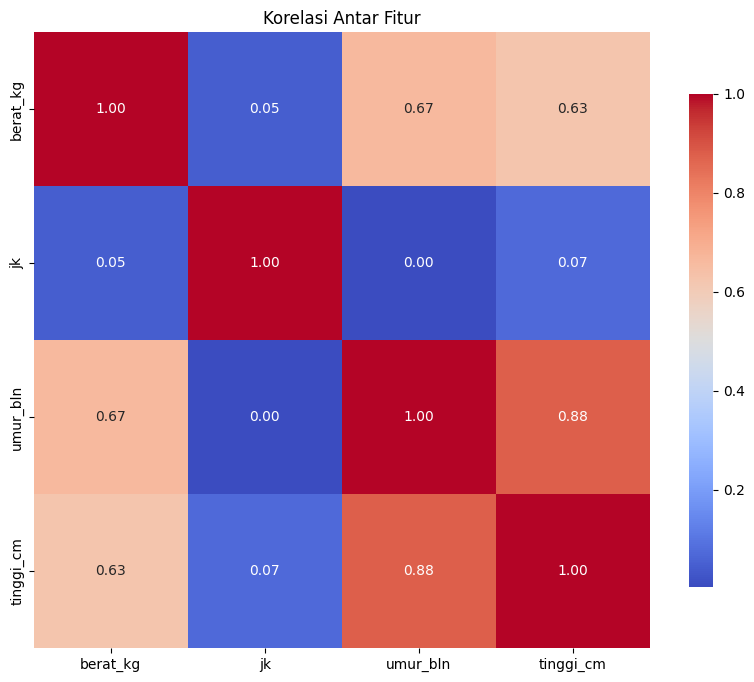

In [13]:
corr_matrix = df2.corr()
print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Korelasi Antar Fitur')

## 5. Membagi dataset untuk Training dan Testing

In [14]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan (berat_kg), # variabel dependent
y = df2['berat_kg']

# Fitur (X) adalah umur dan tinggi, # variabel independent
x = df2[['umur_bln', 'tinggi_cm']]

# split data training 80% dan data testing 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# cetak pembagian data
print(f'Jumlah data latih: {len(x_train)}')
print(f'Jumlah data uji  : {len(x_test)}')

# cek apakah sudah ada constanta pada data training
x_train.head()

Jumlah data latih: 80000
Jumlah data uji  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


## 6. Pemodelan

In [15]:
import statsmodels.api as sm

# Tambahkan Konstanta
x_train_const = sm.add_constant(x_train)
x_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [19]:

# Buat model OLS
model = sm.OLS(y_train, x_train_const).fit()

print("-" * 30)
print(model.params)

const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

print(f"Persamaan Regresi: y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")
print(model.summary())

------------------------------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
Persamaan Regresi: y = 2.546 + 0.230*x1 + 0.054*x2
                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:56:29   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

## 8. Pengujian model dengan data testing

In [21]:
# Tambahkan konstanta ke data uji
x_test_const = sm.add_constant(x_test)

# Prediksi berat badan
y_pred_test = model.predict(x_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": x_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": x_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - {error}/aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
...,...,...,...,...,...,...
32595,9,67.3,11.8,8.260216,-3.539784,70.001830
29313,15,80.2,9.6,10.337607,0.737607,92.316595
37862,8,61.9,8.0,7.737860,-0.262140,96.723246
53421,12,74.9,5.4,9.361232,3.961232,26.643845
